## Observations and Insights 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice. 
len(mouse_metadata["Mouse ID"].value_counts())

249

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
show_duplicates = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]
show_duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study.loc[mouse_study['Mouse ID'] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study.drop_duplicates(subset = ["Mouse ID","Timepoint"])

In [17]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_groups = clean_mouse_study.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# mean tumor volume 
mean_tv = round(drug_groups["Tumor Volume (mm3)"].mean(),2)

# median tumor volume
median_tv = round(drug_groups["Tumor Volume (mm3)"].median(),2)

# variance tumor volume
variance_tv = round(drug_groups["Tumor Volume (mm3)"].var(),2)

# standard deviation tumor volume 
sdev_tv = round(drug_groups["Tumor Volume (mm3)"].std(),2)

# SEM tumor volume 
sem_tv = round(drug_groups["Tumor Volume (mm3)"].sem(),2)

# df 
Drug_summarydf = pd.DataFrame({ "Mean Tumor Volume":mean_tv, 
                                    "Median Tumor Volume": median_tv, 
                                    "Variance Tumor Volume": variance_tv, 
                                    "Standard Deviation Tumor Volume": sdev_tv,
                                     "SEM Tumor Volume": sem_tv
    
    
})

Drug_summarydf



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Drug_summarydf_a = round(drug_groups["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"]),2)

Drug_summarydf_a = Drug_summarydf_a.rename(columns={"mean": "Mean Tumor Volume",
                                                  "median": "Median Tumor Volume",
                                                   "var": "Variance Tumor Volume",
                                                   "std":"Standard Dev Tumor Volume ", 
                                                   "sem":"SM Tumor Volume"})

Drug_summarydf_a

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,SM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Mice'>

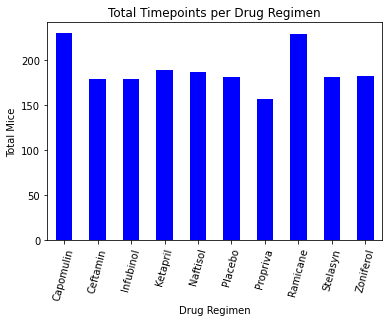

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_ct = drug_groups["Mouse ID"].count()
drug_pdplot = drug_regimen_ct.plot.bar( rot = 75, title = "Total Timepoints per Drug Regimen", fontsize =10, color = "blue")
drug_pdplot.set_xlabel("Drug Regimen")
drug_pdplot.set_ylabel("Total Mice")
drug_pdplot


Text(0, 0.5, 'Total Mice')

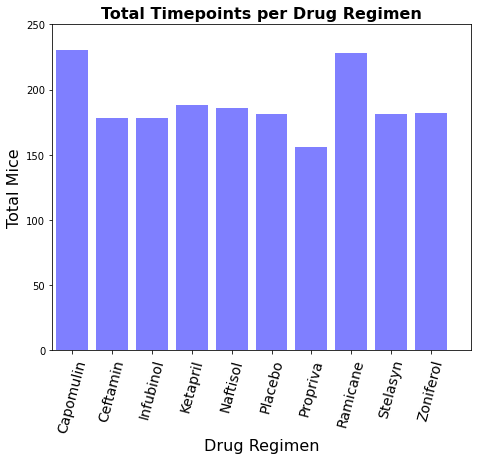

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(drug_regimen_ct))
y_axis = drug_regimen_ct

#Make ticks 
tx = list(drug_regimen_ct.index.values)
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(7.5,6))
plt.bar(x_axis, y_axis, color ='blue', alpha=0.5, align="center")
plt.xticks(tick_locations, tx, rotation="75", fontsize = 14)

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, 250)

# Set a Title and labels
plt.title("Total Timepoints per Drug Regimen",fontsize=16, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Total Mice",fontsize=16)

Text(0, 0.5, '')

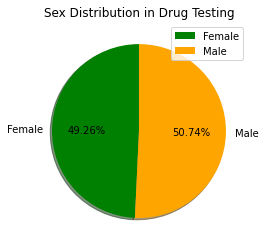

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# separate male and female mice
mouse_sex = clean_mouse_study.groupby(["Sex"]).count()

# create pie chart
mice_piepd = mouse_sex.plot(kind="pie", y='Mouse ID', title=("Sex Distribution in Drug Testing"),
                            colors = ["green","orange"],autopct = "%.2f%%", shadow = True,startangle=90)
# empty y label
mice_piepd.set_ylabel("")

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = clean_mouse_study["Sex"].value_counts()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
